# 
<h1 style="color: teal;">2D Deconvolution Benchmark: Python Scikit-image</h1>

---
## Setup

In [13]:
import numpy as np
from skimage import img_as_float32 as img_as_float
from skimage.restoration import richardson_lucy
import matplotlib.pyplot as plt
import imageio.v2 as iio

---
## Test image

In [14]:
# Cargar imagen degradada y PSF
img_blurred_ski = np.load("ImagenesEmpleadas2D/imagen_borrosa.npy")
psf_test_ski = np.load("ImagenesEmpleadas2D/test_psf.npy")

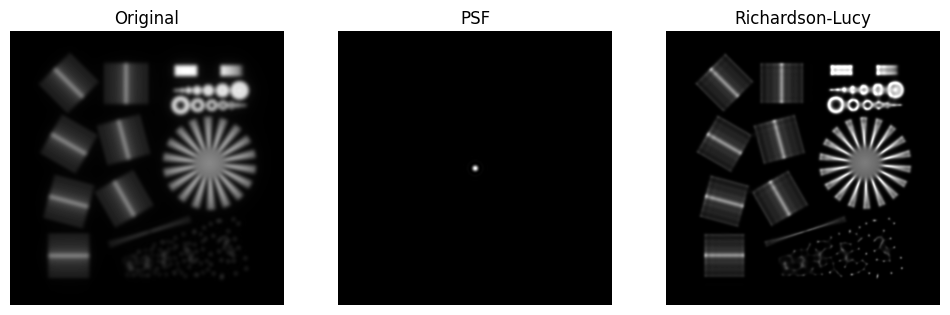

In [15]:

# Deconvolución de la imagen usando el algoritmo de Richardson-Lucy
deconvolved_test_ski = richardson_lucy(img_blurred_ski, psf_test_ski, num_iter=30)

# Mostrar las imágenes original, borrosa y deconvolucionada
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_blurred_ski, cmap='gray')
plt.title('Original')
plt.axis('off')  # Ocultar los ejes para una mejor visualización

plt.subplot(1, 3, 2)
plt.imshow(psf_test_ski, cmap='gray')
plt.title('PSF')
plt.axis('off')  # Ocultar los ejes para una mejor visualización

plt.subplot(1, 3, 3)
plt.imshow(deconvolved_test_ski, cmap='gray')
plt.title('Richardson-Lucy')
plt.axis('off')  # Ocultar los ejes para una mejor visualización

plt.show()


In [16]:
print(img_blurred_ski.shape)
print(psf_test_ski.shape)

(512, 512)
(512, 512)


Guardar la imagen resultante:

In [17]:
plt.imsave("2D_result_image_text_skimage.png", deconvolved_test_ski, cmap='gray')

Medimos ahora el tiempo de la función richardson_lucy()

In [18]:
%timeit -n 1 -r 100 richardson_lucy(img_blurred_ski, psf_test_ski, num_iter=30)

478 ms ± 28.4 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


---
## Cell

In [19]:
# Cargar imagen degradada y PSF
img_cells_ski = np.load("ImagenesEmpleadas2D/2d_cell_imgborrosa.npy")
psf_cells_ski = np.load("ImagenesEmpleadas2D/2d_cell_psf_test.npy")

In [20]:
print(img_cells_ski.dtype)

uint16


In [21]:
# Necesario pasar a float32 ya que la función richardson_lucy no lo hace internamente
img_cells_float = img_as_float(img_cells_ski)

# Padding reflectivo usando numpy para arreglar los bordes
pad_width = [(s//2, s//2) for s in psf_cells_ski.shape]
img_padded = np.pad(img_cells_float, pad_width, mode='reflect')

In [22]:
number_of_iterations = 30
deconvolved_cell_ski = richardson_lucy(img_padded, psf_cells_ski, number_of_iterations)

In [23]:
# Recortar al tamaño original usando slicing
slices = tuple(slice(pad[0], -pad[1]) for pad in pad_width)
deconv_cell_ski = deconvolved_cell_ski[slices]

(-0.5, 255.5, 255.5, -0.5)

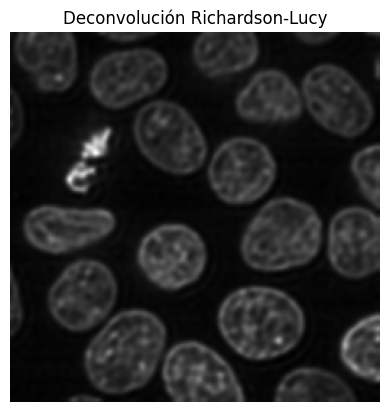

In [24]:
plt.imshow(deconv_cell_ski, cmap='gray') 
plt.title('Deconvolución Richardson-Lucy') 
plt.axis('off') # Ocultar los ejes para una mejor visualización

In [25]:
plt.imsave("2D_result_cells_skimage.png", deconv_cell_ski, cmap='gray')

La medición del tiempo no se hace con la imagen con padding ya que añade píxeles lo hacemos con la imagen original:

In [26]:
%timeit -n 1 -r 100 richardson_lucy(img_cells_float, psf_cells_ski, number_of_iterations)

90.2 ms ± 3.43 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)
